In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
data = pd.read_csv("CCPP_data.csv")

atxpe = data[['AT','PE']]
apxpe = data[['AP','PE']]
rhxpe = data[['RH','PE']]
vxpe = data[['V','PE']]


atxpe_mtx = np.array(atxpe.values,'float')
apxpe_mtx = np.array(apxpe.values,'float')
rhxpe_mtx = np.array(rhxpe.values,'float')
vxpe_mtx = np.array(vxpe.values,'float')

atX = atxpe_mtx[:,1]
atY = atxpe_mtx[:,0]
apX = apxpe_mtx[:,1]
apY = apxpe_mtx[:,0]
rhX = rhxpe_mtx[:,1]
rhY = rhxpe_mtx[:,0]
vX = vxpe_mtx[:,1]
vY = vxpe_mtx[:,0]

linear_regressor = LinearRegression()

0.8989475964148236


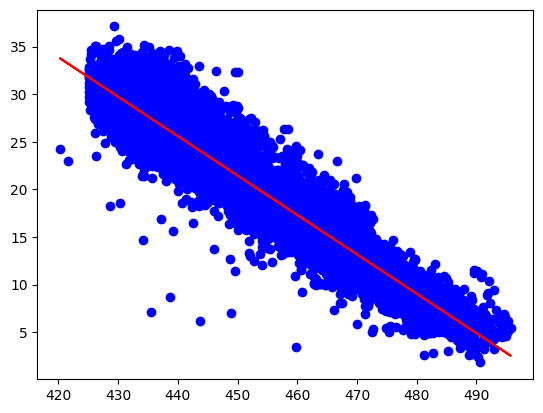

In [4]:
linear_regressor.fit(atX.reshape(-1, 1), atY.reshape(-1, 1))
Y_pred = linear_regressor.predict(atX.reshape(-1, 1))

r2_at = r2_score(atY,Y_pred)
print(r2_at)

plt.plot(atX,atY,'bo')
plt.plot(atX,Y_pred,color='red')
plt.show()

0.7565177870683979


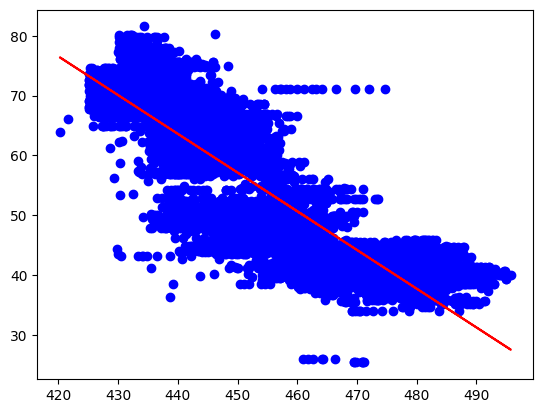

In [5]:
linear_regressor.fit(vX.reshape(-1, 1), vY.reshape(-1, 1))
Y_pred = linear_regressor.predict(vX.reshape(-1, 1))

r2_v = r2_score(vY,Y_pred)
print(r2_v)

plt.plot(vX,vY,'bo')
plt.plot(vX,Y_pred,color='red')
plt.show()

0.2687686564110674


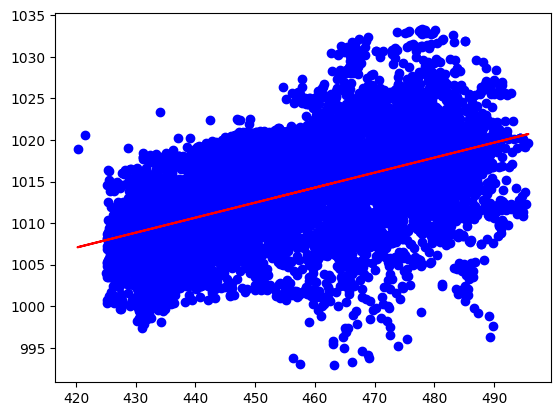

In [6]:
linear_regressor.fit(apX.reshape(-1, 1), apY.reshape(-1, 1))
Y_pred = linear_regressor.predict(apX.reshape(-1, 1))

r2_ap = r2_score(apY,Y_pred)
print(r2_ap)

plt.plot(apX,apY,'bo')
plt.plot(apX,Y_pred,color='red')
plt.show()

0.15193944023117578


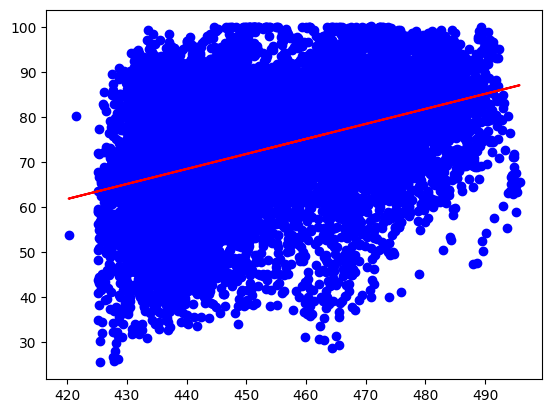

In [7]:
linear_regressor.fit(rhX.reshape(-1, 1), rhY.reshape(-1, 1))
Y_pred = linear_regressor.predict(rhX.reshape(-1, 1))

r2_rh = r2_score(rhY,Y_pred)
print(r2_rh)

plt.plot(rhX,rhY,'bo')
plt.plot(rhX,Y_pred,color='red')
plt.show()

In [40]:
X=np.array(data[['AT','V','AP','RH']].values,'float')
y=np.array(data[['PE']].values,'float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

### Standardization of data ###
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X_scaled = PredictorScalerFit.transform(X)
y_scaled = TargetVarScalerFit.transform(y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.15, random_state=16)
y_test_inv = TargetVarScalerFit.inverse_transform(y_test_scaled)

In [41]:
# Defining a custom function to calculate accuracy
def accuracy(orig, pred):
    MAPE = 100 * (1-mean_absolute_percentage_error(orig, pred))
    return(MAPE)

In [42]:
test_mean = np.mean(y_test)
test_median = np.median(y_test)
test_var = np.var(y_test)
test_std = np.std(y_test)

print(test_mean)
print(test_median)
print(test_var)
print(test_std)

454.0224373259053
450.47
294.08228194245083
17.148827421793328


In [37]:
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

mape = accuracy(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mape)
print(mse)
print(mae)
print(r2)

99.19151050870688
20.712385446977052
3.6631468278174455
0.9295694208091385


In [38]:
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)
ridge_pred = ridge_regressor.predict(X_test)

mape = accuracy(y_test,ridge_pred)
mse = mean_squared_error(y_test,ridge_pred)
mae = mean_absolute_error(y_test,ridge_pred)
r2 = r2_score(y_test,ridge_pred)
print(mape)
print(mse)
print(mae)
print(r2)

99.1915091033571
20.712422596016115
3.6631536417371016
0.9295692944872165


In [39]:
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)
lasso_pred = lasso_regressor.predict(X_test)

mape = accuracy(y_test,lasso_pred)
mse = mean_squared_error(y_test,lasso_pred)
mae = mean_absolute_error(y_test,lasso_pred)
r2 = r2_score(y_test,lasso_pred)
print(mape)
print(mse)
print(mae)
print(r2)

99.18697629399843
20.89808917280438
3.684199931993711
0.9289379522126602


In [48]:
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,15,20],
                      'epochs':[10,20,50,100],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

custom_Scoring=make_scorer(mean_squared_error, greater_is_better=False)

grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

# Running Grid Search for different paramenters
grid_search.fit(X_scaled, y_scaled, verbose=0)

print('### Printing Best parameters ###')
grid_search.best_params_

/var/folders/21/n_wd62cd0cx2t3z53pp0b9sm0000gn/T/ipykernel_8044/2145719119.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModel=KerasRegressor(make_regression_ann, verbose=0)
2022-09-19 01:13:01.917748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-19 01:13:31.844217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-19 01:13:32.337991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-19 01:14:02.789019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-19 01:14:03.266399: I tensorflow/core/gr

### Printing Best parameters ###


{'Optimizer_trial': 'adam', 'batch_size': 10, 'epochs': 100}

In [50]:
grid_search.best_score_

-0.06029261038196245

In [49]:
# Function to generate Deep ANN model 
def make_regression_ann():
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

final_model = make_regression_ann()
final_model.fit(X_train_scaled, y_train_scaled, batch_size=10, epochs=100, verbose=0)
prediction = final_model.predict(X_test_scaled)
prediction = TargetVarScaler.inverse_transform(prediction)

mape = accuracy(y_test_inv, prediction)
mse = mean_squared_error(y_test_inv, prediction)
mae = mean_absolute_error(y_test_inv, prediction)
r2 = r2_score(y_test_inv, prediction)
print(mape)
print(mse)
print(mae)
print(r2)

2022-09-19 13:53:43.695895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 2ms/step
99.28177256114114
17.19172143819993
3.2570579108023043
0.9415411179325512


2022-09-19 13:58:48.601410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
